## Newton's Method

In [53]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from sympy.utilities.lambdify import lambdify
from scipy.sparse import csr_matrix
from scipy import optimize as opt
import time

### Problem 1

In [77]:
def func_newton(Df, DDf, x0, maxiters, tol):
    
    iter = 0
    err = 1
    x = x0
    
    while (err > tol) & (iter < maxiters):
        iter += 1
        
        zk = la.solve(DDf(x), Df(x).T)
        #print("zk is ", zk)
        x1 = x - zk
        
        Dfk1 = Df(x1)
        e = la.norm(Dfk1, np.inf)
        
        #print("e is ", e)
        err = e
        x = x1
        
    return(x1, iter)


f = opt.rosen
df = opt.rosen_der
d2f = opt.rosen_hess
    
func_newton(df, d2f, (-2, 2), 200, 1e-8)

(array([1., 1.]), 5)

## BFGS

### Problem 2

In [78]:

def function_BFGS(Df, x0, maxiter, tol):
    
    n = np.shape(x0)[0]
    A0m1 = np.identity(n)
    x = x0
    Akm1 = A0m1
    err = 1
    iter = 0
    
    while (err > tol) & (iter < maxiter):
        
        Dfx = Df(x)
        Dfxt = Df(x).T
        x1 = x - Akm1@Dfxt # 12.6
        Dfx1 = Df(x1)
        Dfx1t = Df(x1).T
        
        sk = x1 - x
        skT = sk.T
        yk = Dfx1t - Dfxt
        ykT = yk.T
        #print("sk", sk)
        #print("Akm1", Akm1)
        #print("yk", yk)
        #print("ykT", ykT)
        #print("Dfx1", Dfx1)
        #print("Dfx1t", Dfx1t)

        check = (skT*yk)
        if (check== 0):
            break
        
        p1 = ((skT*yk + ykT*Akm1*yk)*np.outer(sk,skT)) / (skT*yk)**2
        p2 = (Akm1@np.outer(yk,skT) + np.outer(sk,ykT)@Akm1) / skT*yk
        
        Akm1p = Akm1 + p1 - p2
        
        # Compute error
        Dfk1 = Df(x1)
        e = la.norm(Dfk1, np.inf)
        
        print("e is ", e)
        err = e
        x = x1
        Akm1 = Akm1p
        # Update
        
    return(x1, iter)
        
f = opt.rosen
df = opt.rosen_der
d2f = opt.rosen_hess
    
function_BFGS(df, (-2, 2), 200, 1e-8)      
        
        


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Problem 3

In [93]:

def function_time(n):
    
    x0 = np.array((np.random.uniform(-3, 3), np.random.uniform(-3, 3)))
    
    Newton_time = np.empty(1)
    BFGS = np.empty(1)
    scipy = np.empty(1)
    Newton_iter = np.empty(1)
    BFGS_iter = np.empty(1)
    scipy_iter = np.empty(1)
    
    F = opt.rosen
    Df = opt.rosen_der
    DDf = opt.rosen_hess
        
    for i in range(n):
        time_s = time.time()
        n, ni = func_newton(Df, DDf, x0, maxiters = 100, tol=1e-6)
        time_f = time.time() - time_s
        Newton_time = np.append(Newton_time, time_f)
        Newton_iter = np.append(Newton_iter, ni) 
        #B, Bi = function_BFGS(Df, x0, maxiters = 100, tol=1e-6)
        #BFGS = np.append(BFGS, B)
        #BFGS_iter = np.append(BFGS_iter, B)
        #s = opt.fmin_bfgs(f=F, x0=x0, fprime=Df, maxiter=100, disp = False, retall = True)
        #scipy = np.append(sci)
    return(Newton_time, Newton_iter, BFGS, BFGS_iter)


NT, NI, BT, BI = function_time(10000)

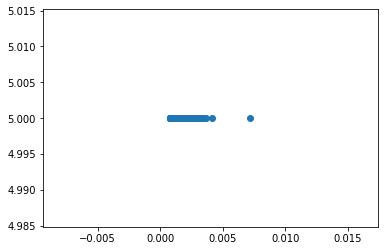

In [94]:
plt.scatter(NT[1:], NI[1:])

In [67]:
F = opt.rosen
Df = opt.rosen_der
DDf = opt.rosen_hess
x0 = np.array((np.random.uniform(-3, 3), np.random.uniform(-3, 3)))

x = opt.fmin_bfgs(f=F, x0=x0, fprime=Df, maxiter=100, disp = False, retall = True)




In [74]:
np.size(x)

2